# Technical test for interview at Aqsone

This notebook explain the methodology of the Aqsone technical test. \\
I did the test on my personal laptop which is an Asus with an intel core i7 7th generation. \\ 
I have 16 Go of RAM and my operating system is Windows 10. \\

On this laptop, I am using Python 3.7.7 distributed by conda but I also like to use venv

For more information of Pyton libraries, see bellow..

Table of contents :
1. Importing libraries for coding
2. Data Preparation
3. Prediction

## 1. Importing libraries for coding

In [1]:
import pandas as pd
import numpy as np
import time

# plot lib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


pd.set_option('display.max_columns', 99)


In [8]:
df_car = pd.read_csv("./AQSONE_Practice_Test_DS_V3_Dataset_B - AQSONE_Practice_Test_DS_V3_Dataset_B.csv")

print(len(df_car))

df_car.head()

8128


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6164.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2164.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3082.0,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1781.0,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df_car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8128.000000,8.128000e+03,7907.000000
mean,2013.804011,8743.468135,6.981951e+04,5.416719
std,4.044249,11044.559233,5.655055e+04,0.959588
min,1983.000000,411.000000,1.000000e+00,2.000000
25%,2011.000000,3493.000000,3.500000e+04,5.000000
50%,2015.000000,6164.000000,6.000000e+04,5.000000
75%,2017.000000,9247.000000,9.800000e+04,5.000000
max,2020.000000,136986.000000,2.360457e+06,14.000000


# 2. Data Analysis

We are going to analyse each variable and see if their have impact on the target \\
Let's start with categorical variables

## 2.1. Categorical variables

,fuel,selling_price
0,CNG,57
1,Diesel,4402
2,LPG,38
3,Petrol,3631


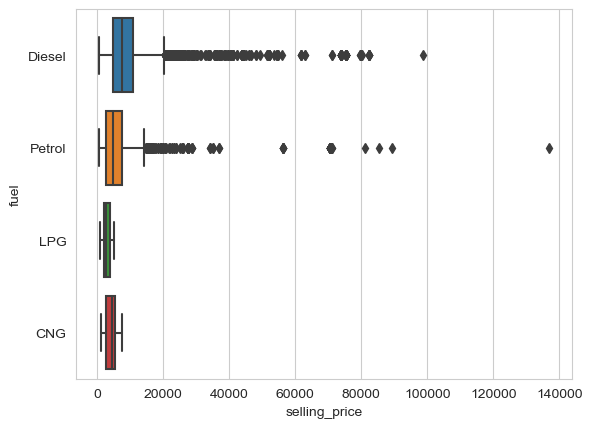

In [27]:
sns.boxplot(data=df_car, x="selling_price", y="fuel")

df_car.groupby('fuel', as_index=False).agg({'selling_price':'count'})

,seller_type,selling_price
0,Dealer,1126
1,Individual,6766
2,Trustmark Dealer,236


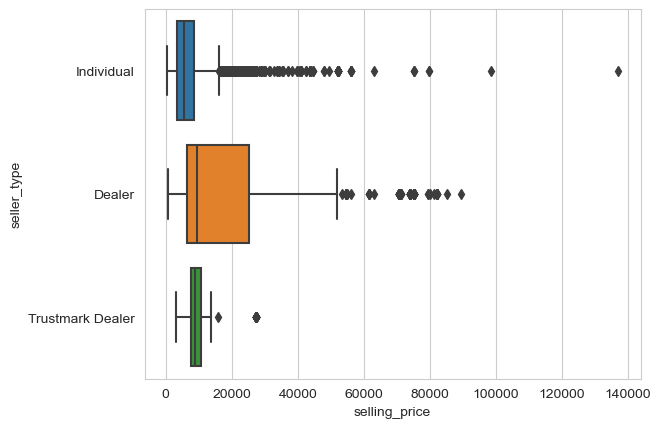

In [29]:
sns.boxplot(data=df_car, x="selling_price", y="seller_type") 
df_car.groupby('seller_type', as_index=False).agg({'selling_price':'count'})

,transmission,selling_price
0,Automatic,1050
1,Manual,7078


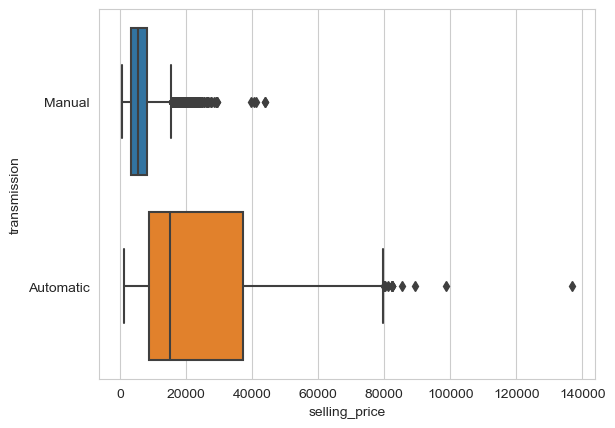

In [31]:
sns.boxplot(data=df_car, x="selling_price", y="transmission") 
df_car.groupby('transmission', as_index=False).agg({'selling_price':'count'})

,owner,selling_price
0,First Owner,5289
1,Fourth & Above Owner,174
2,Second Owner,2105
3,Test Drive Car,5
4,Third Owner,555


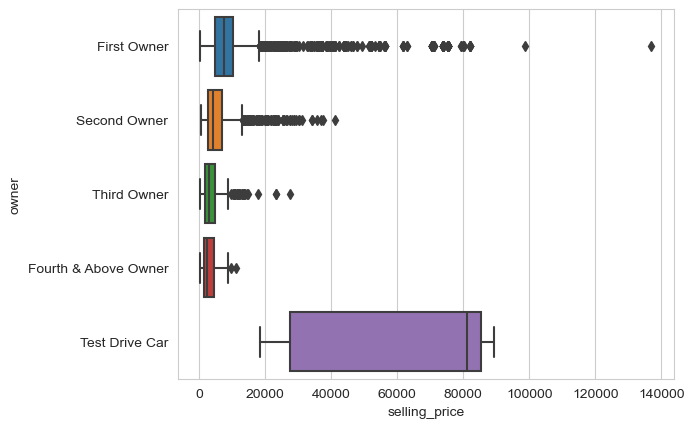

In [32]:
sns.boxplot(data=df_car, x="selling_price", y="owner") 
	
df_car.groupby('owner', as_index=False).agg({'selling_price':'count'})

,seats,selling_price
0,10.0,19
1,14.0,1
2,2.0,2
3,4.0,133
4,5.0,6254
5,6.0,62
6,7.0,1120
7,8.0,236
8,9.0,80
9,nan,221


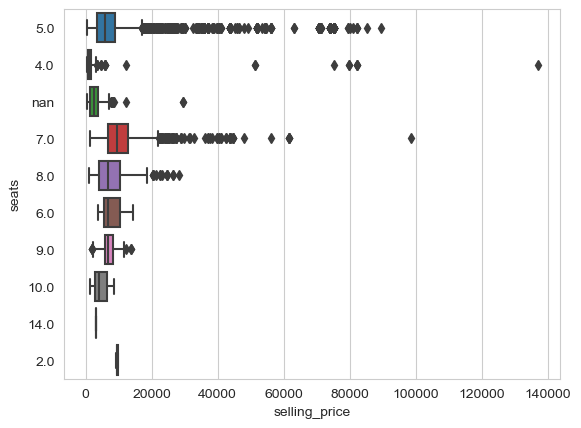

In [38]:
df_car['seats'] = df_car['seats'].astype(str)
sns.boxplot(data=df_car, x="selling_price", y="seats") 
df_car.groupby('seats', as_index=False).agg({'selling_price':'count'})

## 2.2 Numerical variables


<AxesSubplot:xlabel='selling_price', ylabel='year'>

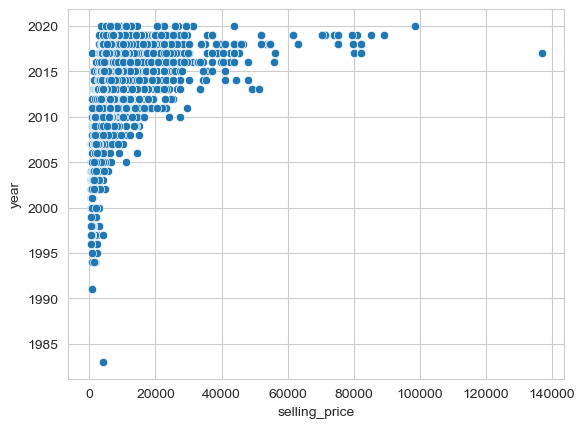

In [15]:
sns.scatterplot(data=df_car, x="selling_price", y="year")
#   

<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>

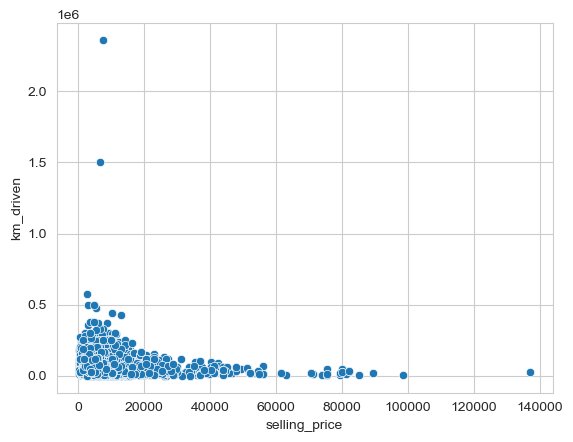

In [16]:
sns.scatterplot(data=df_car, x="selling_price", y="km_driven") 

# 2.3 Try some features togethter

<AxesSubplot:xlabel='selling_price', ylabel='year'>

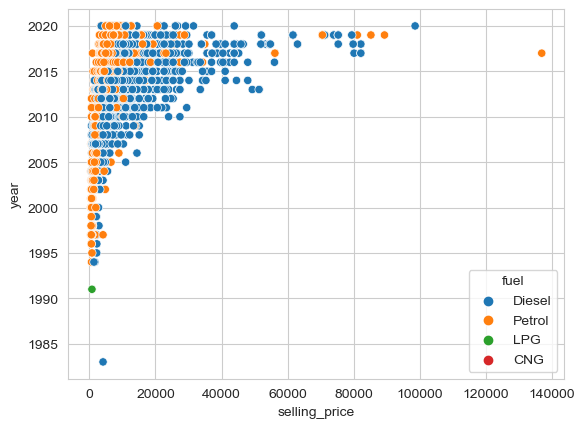

In [20]:
cat_col_list = ['fuel', 'seller_type', 'transmission', 'owner']
num_col_list = ['year', 'km_driven', 'km_driven']

sns.scatterplot(data=df_car, x="selling_price", y=num_col_list[0], hue=cat_col_list[0])

## 2. Data preparation

lets extract informations from columns

In [34]:
df_car['mileage_clean'] = df_car['mileage'].apply(lambda x: str(x).replace(' kmpl', ''))
df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_clean
0,Maruti Swift Dzire VDI,2014,6164.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,2164.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7
3,Hyundai i20 Sportz Diesel,2010,3082.0,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0
4,Maruti Swift VXI BSIII,2007,1781.0,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1


# 3. Prediction

In [55]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error


In [56]:
col_to_use_cat = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
col_to_use_num = ['year', 'km_driven']
target = 'selling_price'

df_car_for_prediction = df_car[col_to_use_cat + col_to_use_num + [target]].copy()

df_car_for_prediction.head()

,fuel,seller_type,transmission,owner,seats,year,km_driven,selling_price
0,Diesel,Individual,Manual,First Owner,5.0,2014,145500,6164.0
1,Diesel,Individual,Manual,Second Owner,5.0,2014,120000,5068.0
2,Petrol,Individual,Manual,Third Owner,5.0,2006,140000,2164.0
3,Diesel,Individual,Manual,First Owner,5.0,2010,127000,3082.0
4,Petrol,Individual,Manual,First Owner,5.0,2007,120000,1781.0


In [57]:
# Dumisation of categorical data + nomalization of numerical values
df_car_for_prediction = pd.merge(
    df_car_for_prediction,
    pd.get_dummies(df_car_for_prediction[col_to_use_cat]),
    left_index=True,
    right_index=True
)

for num_col in col_to_use_num:
    max_value = df_car_for_prediction[num_col].max()
    min_value = df_car_for_prediction[num_col].min()
    df_car_for_prediction[f"{num_col}_norm"] = (df_car_for_prediction[num_col] - min_value) / (max_value - min_value)


df_car_for_prediction.head()


,fuel,seller_type,transmission,owner,seats,year,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_10.0,seats_14.0,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_nan,year_norm,km_driven_norm
0,Diesel,Individual,Manual,First Owner,5.0,2014,145500,6164.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.837838,0.061640
1,Diesel,Individual,Manual,Second Owner,5.0,2014,120000,5068.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.837838,0.050837
2,Petrol,Individual,Manual,Third Owner,5.0,2006,140000,2164.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.621622,0.059310
3,Diesel,Individual,Manual,First Owner,5.0,2010,127000,3082.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.729730,0.053803
4,Petrol,Individual,Manual,First Owner,5.0,2007,120000,1781.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.648649,0.050837


In [60]:
# split 70 % train and 30 % test
# use sklearn for accuracy

collist = [elt for elt in df_car_for_prediction.columns if elt not in col_to_use_cat + col_to_use_num]

X = df_car_for_prediction[collist].values
y = df_car_for_prediction[target].values

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

RF_reg = RandomForestRegressor(n_estimators=300)

RF_reg.fit(X_train, y_train)

prediction = RF_reg.predict(X_test)

mape_error = mean_absolute_percentage_error(y_test, prediction)
print(mape_error)

0.0006060798298807973
